### Load the Dataset

In [74]:
%pip install kagglehub pandas

import kagglehub
import pandas as pd
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("sumitm004/arxiv-scientific-research-papers-dataset")

# Assuming the downloaded file is a CSV and finding the filename
# List files in the downloaded directory
files = os.listdir(dataset_path)
csv_file = None
for file in files:
    if file.endswith('.csv'):
        csv_file = file
        break

if not csv_file: raise "No CSV file found in the downloaded dataset."

file_path = os.path.join(dataset_path, csv_file)
# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display information about the DataFrame
print("\nInformation about the DataFrame:")
df.info()

Note: you may need to restart the kernel to use updated packages.
First 5 rows of the DataFrame:
First 5 rows of the DataFrame:


,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,9/1/93,9/1/93,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187



Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136238 entries, 0 to 136237
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  136238 non-null  object
 1   title               136238 non-null  object
 2   category            136238 non-null  object
 3   category_code       136238 non-null  object
 4   published_date      136238 non-null  object
 5   updated_date        136238 non-null  object
 6   authors             136238 non-null  object
 7   first_author        136238 non-null  object
 8   summary             136238 non-null  object
 9   summary_word_count  136238 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.4+ MB


In [75]:
def parse_date(string: str):
    match list(map(int, string.split("/"))):
        case [month, day, year] if year >= 50:
            return (month, day, 1900 + year)
        case [month, day, year] if year <= 50:
            return (month, day, 2000 + year)
        case v:
            print(f"Unknown format: {v}")
            return None

In [76]:
import pandas as pd
from collections import defaultdict

# Get all unique years from the dataset
all_years = { y for _, _, y in map(parse_date, list(df["published_date"])) if isinstance(y, int) }

if not all_years:
    print("No valid years found in the dataset.")
    grouped_documents = {}
else:
    # Initialize the dictionary to hold the grouped series of documents
    buckets = {
        2000 + 2004j,
        2005 + 2009j,
        2010 + 2014j,
        2015 + 2019j,
        2020 + 2025j,
        1900 + 1999j
    }
    grouped_series = defaultdict(list)

    # Group documents into 5-year buckets for years >= 2000
    latest_year = max(all_years)
    for index, docu in df.iterrows():
        parsed_date = parse_date(docu["published_date"])
        if not parsed_date: continue

        _, _, year = parsed_date
        for bucket_bound in buckets:
            if bucket_bound.real <= year <= bucket_bound.imag:
                group_name = f"{int(bucket_bound.real)}-{int(bucket_bound.imag)}"
                grouped_series[group_name].append(docu)

    # Convert the lists of documents into DataFrames
    grouped_documents = { y: pd.DataFrame(v) for y, v in grouped_series.items() }

    # Print the head of the first group to verify
    if grouped_documents:
        first_group_name = sorted(grouped_documents.keys(), reverse=True)[0]
        print(f"Documents from group: {first_group_name}")
        display(grouped_documents[first_group_name].head())
    else:
        print("No documents were grouped.")

Documents from group: 2020-2025


,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
3464,abs-2002.00429v2,Uncertainty Weighted Causal Graphs,Artificial Intelligence,cs.AI,2/2/20,2/6/20,"['Eduardo C. Garrido-Merchán', 'C. Puente', 'A...",'Eduardo C. Garrido-Merchán',Causality has traditionally been a scientific ...,111
3465,abs-2002.00434v2,Integrating Deep Reinforcement Learning with M...,Artificial Intelligence,cs.AI,2/2/20,5/19/20,"['Ekim Yurtsever', 'Linda Capito', 'Keith Redm...",'Ekim Yurtsever',Automated driving in urban settings is challen...,181
3466,abs-2002.00509v2,A Machine Consciousness architecture based on ...,Artificial Intelligence,cs.AI,2/2/20,3/14/20,"['Eduardo C. Garrido Merchán', 'Martín Molina']",'Eduardo C. Garrido Merchán',Recent developments in machine learning have p...,197
3467,abs-2002.01080v4,Bridging the Gap: Providing Post-Hoc Symbolic ...,Artificial Intelligence,cs.AI,2/4/20,3/19/22,"['Sarath Sreedharan', 'Utkarsh Soni', 'Mudit V...",'Sarath Sreedharan',As increasingly complex AI systems are introdu...,148
3468,abs-2002.01088v1,Neuro-evolutionary Frameworks for Generalized ...,Artificial Intelligence,cs.AI,2/4/20,2/4/20,['Thommen George Karimpanal'],'Thommen George Karimpanal',The recent successes of deep learning and deep...,144


In [77]:
%pip install nltk

import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [78]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and tokenize
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

### Preprocessing Text

This function cleans and prepares text data for LDA modeling by:
- Converting to lowercase
- Removing special characters
- Tokenizing
- Removing stopwords
- Lemmatizing words

In [79]:
%pip install hyperopt

from collections import Counter
import pickle
from gensim.models import LdaMulticore, CoherenceModel
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from hyperopt.early_stop import no_progress_loss
import numpy as np

class Box[T]:
    def __init__(self, data: T):
        self.data = data

# -------------------------
# Hyperopt search space - ONLY topic count
# -------------------------
search_space = {
    'num_topics':  hp.quniform('num_topics', 5, 12, 1), # Search from 3 to 15 topics
}

def objective(train_corpus, test_corpus, dictionary, train_texts,
              test_texts, params, group_name, counter: Box[int]):
    """
    Objective function for Bayesian optimization.
    Trains on train set, evaluates on test set.
    """
    try:
        num_topics = int(params['num_topics'])
        passes = 15
        if len(train_corpus) >= 10_000:
            passes = 10

        # Train on training data
        lda_model = LdaMulticore(
            corpus=train_corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            chunksize=100,
            passes=passes,
            workers=4
        )

        # Evaluate coherence on test set (use train texts if test is too small)
        try:
            coherence_score = CoherenceModel(
                model=lda_model,
                texts=train_texts + test_texts,
                dictionary=dictionary,
                coherence='c_v'
            ).get_coherence()

            # Handle NaN coherence
            if coherence_score is None or np.isnan(coherence_score):
                coherence_score = 0.0
        except Exception as e:
            print(f"  Coherence calculation error: {e}")
            coherence_score = 0.0

        # Evaluate perplexity on test set
        try:
            log_perplexity = lda_model.log_perplexity(test_corpus)
            if np.isnan(log_perplexity) or np.isinf(log_perplexity):
                perplexity_score = 0.0
            else:
                perplexity_score = 2**(-log_perplexity)
        except Exception as e:
            print(f"  Perplexity calculation error: {e}")
            perplexity_score = 0.0

        print(f"Trial {counter.data}: Topics={num_topics}, Coherence={coherence_score:.4f}, Perplexity={perplexity_score:.4f}")

        # Save model
        if not os.path.exists(f'lda_models/lda_{group_name}'):
            os.makedirs(f'lda_models/lda_{group_name}')

        model_path = f'lda_models/lda_{group_name}/{counter.data}.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump({
                'model': lda_model,
                'num_topics': num_topics,
                'coherence': coherence_score,
                'perplexity': perplexity_score
            }, f)

        counter.data += 1

        # Optimize for coherence (fmin minimizes, so return negative)
        # If coherence is 0, return high loss
        if coherence_score <= 0:
            return {'loss': 1e6, 'status': STATUS_OK}

        return {'loss': -coherence_score, 'status': STATUS_OK}
    except Exception as e:
        print(f"Error in trial {counter.data}: {e}")
        counter.data += 1
        return {'loss': 1e6, 'status': 'fail'}


def create_optimized_model(train_corpus, test_corpus, dictionary,
                           train_texts, test_texts, group_name, max_evals=15):
    """
    Run Bayesian optimization to find best number of topics.
    Returns best model trained on full dataset.
    """
    counter = Box(0)
    trials = Trials()

    print(f"\n{'='*60}")
    print(f"Starting Bayesian Optimization for {group_name}")
    print(f"Train set: {[len(x) for x in train_corpus]} docs")
    print(f"Test set: {[len(x) for x in test_corpus]} docs")
    print(f"{'='*60}")

    best = fmin(
        fn=lambda params: objective(train_corpus, test_corpus, dictionary, train_texts, test_texts, params, group_name, counter),
        space=search_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=no_progress_loss(5)
    )

    parameters = space_eval(search_space, best)
    num_topics = int(parameters['num_topics'])

    print(f"\n{'='*60}")
    print(f"Best configuration for {group_name}:")
    print(f"  Number of topics: {num_topics}")
    print(f"{'='*60}\n")

    # Train final model on FULL dataset with best parameters
    print("Training final model on full dataset...")
    full_corpus = train_corpus + test_corpus
    full_texts = train_texts + test_texts

    final_lda = LdaMulticore(
        corpus=full_corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=100,
        chunksize=100,
        passes=20,
        workers=4
    )

    # Calculate final metrics on full dataset
    try:
        final_coherence = CoherenceModel(
            model=final_lda,
            texts=full_texts,
            dictionary=dictionary,
            coherence='c_v'
        ).get_coherence()

        if final_coherence is None or np.isnan(final_coherence):
            final_coherence = 0.0
    except Exception as e:
        print(f"Final coherence error: {e}")
        final_coherence = 0.0

    try:
        log_perp = final_lda.log_perplexity(full_corpus)
        if np.isnan(log_perp) or np.isinf(log_perp):
            final_perplexity = 0.0
        else:
            final_perplexity = 2**(-log_perp)
    except Exception as e:
        print(f"Final perplexity error: {e}")
        final_perplexity = 0.0

    print(f"Final model - Coherence: {final_coherence:.4f}, Perplexity: {final_perplexity:.4f}")

    return final_lda, num_topics, final_coherence, final_perplexity

Note: you may need to restart the kernel to use updated packages.


In [80]:
%pip install gensim scikit-learn

from pandas import DataFrame
from gensim.corpora import Dictionary
from sklearn.model_selection import train_test_split

def process_lda(dataframe: DataFrame, group_name: str):
    """
    Process LDA with train-test split for proper evaluation.
    """
    df = dataframe.copy()

    # Apply the preprocessing function
    print(f"Preprocessing {len(df)} documents...")
    df['processed_summary'] = df['summary'].apply(preprocess_text)

    # Remove empty documents and documents that are too short
    df = df[df['processed_summary'].apply(lambda x: len(x) >= 5)]
    print(f"After filtering: {len(df)} documents")

    if len(df) < 10:
        print(f"WARNING: Too few documents ({len(df)}) for {group_name}")
        return None, 0, 0.0, 0.0

    # Create a dictionary from the processed_summary column
    dictionary = Dictionary(df['processed_summary'])

    # Filter extremes - keep words that appear in at least 2 docs and at most 50% of docs
    dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=10000)

    print(f"Dictionary size: {len(dictionary)} unique tokens")

    # Create corpus (bag-of-words representation)
    corpus = [dictionary.doc2bow(text) for text in df['processed_summary']]

    # Remove empty documents after BoW conversion
    valid_indices = [i for i, doc in enumerate(corpus) if len(doc) > 0]
    corpus = [corpus[i] for i in valid_indices]
    df = df.iloc[valid_indices].reset_index(drop=True)

    print(f"Valid documents after BoW: {len(corpus)}")

    # Train-test split (80-20)
    if len(corpus) < 20:
        print("WARNING: Not enough documents for train-test split, using all for training")
        train_corpus = corpus
        test_corpus = corpus[:max(1, len(corpus) // 5)]  # Use small subset as test
        train_texts = list(df['processed_summary'])
        test_texts = train_texts[:len(test_corpus)]
    else:
        train_indices, test_indices = train_test_split(
            range(len(corpus)),
            test_size=0.2,
            random_state=42
        )

        train_corpus = [corpus[i] for i in train_indices]
        test_corpus = [corpus[i] for i in test_indices]
        train_texts = [df['processed_summary'].iloc[i] for i in train_indices]
        test_texts = [df['processed_summary'].iloc[i] for i in test_indices]

    print(f"Train set: {len(train_corpus)} documents")
    print(f"Test set: {len(test_corpus)} documents")

    # Run Bayesian optimization
    lda_model, num_topics, coherence, perplexity = create_optimized_model(
        train_corpus,
        test_corpus,
        dictionary,
        train_texts,
        test_texts,
        group_name
    )

    # Print the topics learned by the LDA model
    print("\nLDA Topics:")
    for idx, topic in lda_model.print_topics(num_words=10):
        print(f"Topic {idx + 1}: {topic}")

    return lda_model, num_topics, coherence, perplexity

Note: you may need to restart the kernel to use updated packages.


In [81]:
# For each group of years, we want to run the LDA for their own.
from gensim.models import LdaMulticore
import os
import pickle

# Create a directory to save the models
if not os.path.exists('lda_models'):
    os.makedirs('lda_models')

ldas: dict[str, tuple[LdaMulticore, int, DataFrame]] = {}
display(grouped_documents.keys())

dict_keys(['1900-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2025'])

In [82]:
results_summary = []

for year_group, dataframe in grouped_documents.items():
    print(f"\n{'#'*70}")
    print(f"# Processing group: {year_group}")
    print(f"{'#'*70}\n")

    lda_result = process_lda(dataframe, year_group)
    lda_model, num_topics, coherence, perplexity = lda_result

    # Store results
    ldas[year_group] = (lda_model, num_topics, dataframe)

    # Track summary
    results_summary.append({
        'year_group': year_group,
        'num_topics': num_topics,
        'coherence': coherence,
        'perplexity': perplexity,
        'num_documents': len(dataframe)
    })

    print(f"\n✓ Finished processing for group: {year_group}")
    print(f"  Final Topics: {num_topics}")
    print(f"  Coherence: {coherence:.4f}")
    print(f"  Perplexity: {perplexity:.4f}\n")

    # Save individual model
    model_path = f'lda_models/lda_{year_group}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(ldas[year_group], f)

# Save the entire dictionary of models
model_path = 'lda_models/all_lda_models.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(ldas, f)

print(f"\n{'='*70}")
print(f"All models saved to {model_path}")
print(f"{'='*70}\n")

# Display summary table
summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values('year_group')
print("\nSUMMARY OF ALL MODELS:")
print(summary_df.to_string(index=False))


######################################################################
# Processing group: 1900-1999
######################################################################

Preprocessing 983 documents...
After filtering: 983 documents
Dictionary size: 3765 unique tokens
Valid documents after BoW: 983
Train set: 786 documents
Test set: 197 documents

Starting Bayesian Optimization for 1900-1999
Train set: [77, 32, 43, 29, 13, 59, 36, 35, 65, 53, 37, 53, 41, 36, 43, 46, 45, 17, 15, 34, 42, 34, 66, 49, 41, 57, 44, 81, 58, 50, 68, 61, 19, 72, 36, 58, 52, 80, 50, 51, 79, 37, 53, 51, 25, 30, 61, 40, 60, 65, 48, 30, 64, 38, 42, 53, 16, 37, 63, 43, 67, 48, 49, 80, 77, 23, 33, 27, 42, 43, 27, 37, 37, 70, 34, 62, 60, 41, 44, 50, 36, 64, 57, 42, 48, 37, 32, 55, 39, 68, 43, 30, 42, 57, 65, 41, 36, 46, 52, 30, 55, 57, 62, 60, 42, 76, 52, 44, 70, 16, 50, 51, 35, 31, 41, 35, 30, 66, 24, 35, 13, 38, 33, 23, 57, 36, 76, 37, 51, 54, 59, 30, 57, 59, 72, 34, 43, 51, 77, 26, 49, 36, 47, 34, 37, 60, 44, 82

In [83]:
# Display detailed topic information for each year group
for year, (lda_model, topic_count, dataframe) in ldas.items():
    print(f"\n{'='*70}")
    print(f"Year Group: {year}")
    print(f"Number of Topics: {topic_count}")
    print(f"{'='*70}\n")
    
    print("Top 10 words per topic:")
    for idx, topic in lda_model.print_topics(num_words=10):
        print(f"\nTopic {idx + 1}:")
        print(f"  {topic}")
    
    print(f"\n{'-'*70}\n")


Year Group: 1900-1999
Number of Topics: 5

Top 10 words per topic:

Topic 1:
  0.014*"language" + 0.013*"structure" + 0.011*"discourse" + 0.010*"semantic" + 0.008*"interpretation" + 0.008*"natural" + 0.008*"logic" + 0.008*"semantics" + 0.007*"system" + 0.007*"theory"

Topic 2:
  0.015*"word" + 0.012*"language" + 0.011*"system" + 0.011*"method" + 0.011*"corpus" + 0.009*"approach" + 0.009*"model" + 0.009*"information" + 0.008*"text" + 0.008*"result"

Topic 3:
  0.019*"model" + 0.016*"algorithm" + 0.012*"system" + 0.012*"language" + 0.010*"problem" + 0.008*"result" + 0.007*"application" + 0.006*"dialogue" + 0.006*"one" + 0.006*"used"

Topic 4:
  0.018*"model" + 0.014*"agent" + 0.013*"learning" + 0.010*"problem" + 0.009*"language" + 0.008*"system" + 0.008*"planning" + 0.007*"different" + 0.007*"show" + 0.007*"plan"

Topic 5:
  0.024*"grammar" + 0.014*"algorithm" + 0.009*"theory" + 0.009*"parsing" + 0.008*"rule" + 0.007*"constraint" + 0.007*"word" + 0.007*"system" + 0.007*"feature" + 0.007

### Visualize Model Performance

Compare coherence and perplexity scores across different year groups.

Note: you may need to restart the kernel to use updated packages.


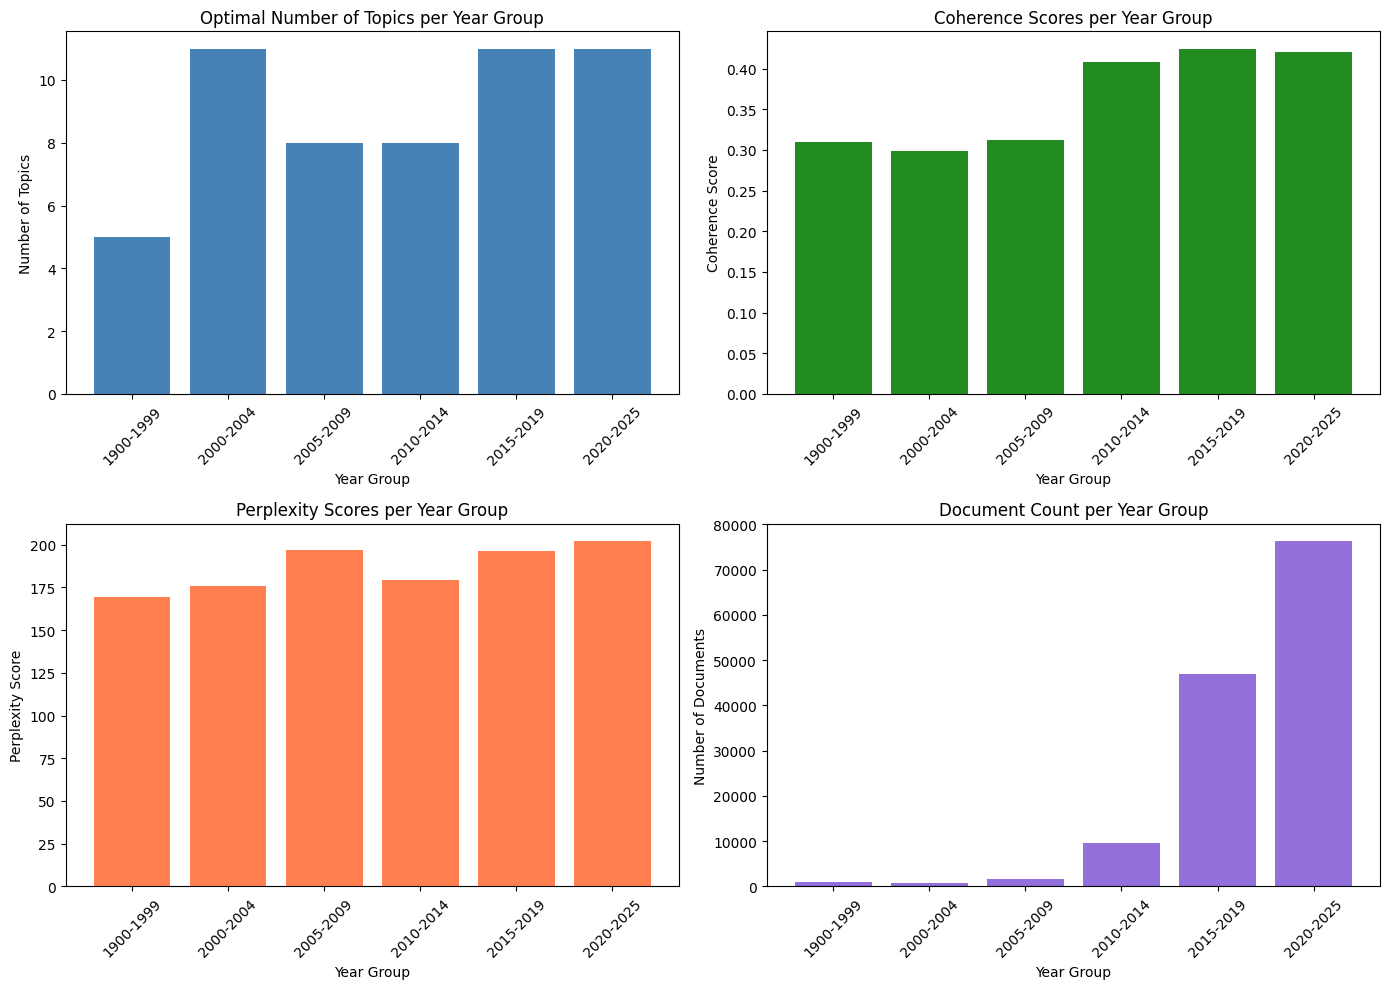


FINAL SUMMARY
year_group  num_topics  coherence  perplexity  num_documents
 1900-1999           5   0.310414  169.400770            983
 2000-2004          11   0.298803  175.571827            744
 2005-2009           8   0.311703  197.164654           1665
 2010-2014           8   0.408561  179.238569           9578
 2015-2019          11   0.424745  196.234526          46952
 2020-2025          11   0.420454  202.132112          76316


In [84]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Number of Topics per Year Group
ax1 = axes[0, 0]
summary_df_sorted = summary_df.sort_values('year_group')
ax1.bar(summary_df_sorted['year_group'], summary_df_sorted['num_topics'], color='steelblue')
ax1.set_xlabel('Year Group')
ax1.set_ylabel('Number of Topics')
ax1.set_title('Optimal Number of Topics per Year Group')
ax1.tick_params(axis='x', rotation=45)

# 2. Coherence Scores
ax2 = axes[0, 1]
ax2.bar(summary_df_sorted['year_group'], summary_df_sorted['coherence'], color='forestgreen')
ax2.set_xlabel('Year Group')
ax2.set_ylabel('Coherence Score')
ax2.set_title('Coherence Scores per Year Group')
ax2.tick_params(axis='x', rotation=45)

# 3. Perplexity Scores
ax3 = axes[1, 0]
ax3.bar(summary_df_sorted['year_group'], summary_df_sorted['perplexity'], color='coral')
ax3.set_xlabel('Year Group')
ax3.set_ylabel('Perplexity Score')
ax3.set_title('Perplexity Scores per Year Group')
ax3.tick_params(axis='x', rotation=45)

# 4. Number of Documents
ax4 = axes[1, 1]
ax4.bar(summary_df_sorted['year_group'], summary_df_sorted['num_documents'], color='mediumpurple')
ax4.set_xlabel('Year Group')
ax4.set_ylabel('Number of Documents')
ax4.set_title('Document Count per Year Group')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)